In [128]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import matplotlib
import matplotlib.pyplot as plt
import sys
import socket
import itertools
from pprint import pprint

In [129]:
plt.rcParams['figure.figsize'] = [10, 8]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 0}

matplotlib.rc('font', **font)

In [130]:
matplotlib.rcParams.update({'font.size': 72})

In [131]:
matplotlib.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid

In [132]:
mask = np.ones((3,3))
for i in range(0,3):
    for j in range(0,i+1):
        mask[i][j] = False  # 掩蓋掉上面的三角形

# DL B3.B7.B8

In [133]:
schemes = [
    "B3",
    "B7",
    "B8",
    # "All@qc01",
    # "All@qc02",
    # "All@qc03",
]
# xs = list(itertools.combinations(range(len(schemes)), 2))

df1 = pd.read_csv("/home/wmnlab/D/database/2023-02-04/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#01/udp_dnlk_combo_statistics.csv")
df2 = pd.read_csv("/home/wmnlab/D/database/2023-02-04/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#02/udp_dnlk_combo_statistics.csv")
df3 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#01/udp_dnlk_combo_statistics.csv")
df4 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#02/udp_dnlk_combo_statistics.csv")
# print(df1.at[0, 'lost.B3'])
# print(df2.at[0, 'lost.B3'])

# df = pd.concat([df1, df2], axis=0)
df = pd.concat([df1, df2, df3, df4], axis=0)
df.reset_index(drop=True, inplace=True)
# print(df)
dfm = df.mean(axis=0)
# print(dfm)
# print(dfm['lost.B3'])

mat = []
for i in range(3):
    # mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            print(schemes[i], end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            print(f"{schemes[i]}.{schemes[j]}", end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            print(0, end=' ')
            # mat[i].append(0)
    print()

B3 B3.B7 B3.B8 
0 B7 B7.B8 
0 0 B8 


### Loss Rate

[[0.24054797993707447, 0.04287093795031929, 0.0],
 [0, 0.7263574630675708, 0.0],
 [0, 0, 0.2828365361283679]]


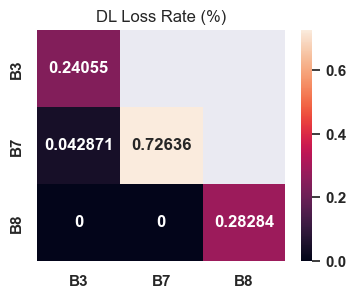

In [134]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Loss Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Excl Rate

[[0.3466636909983227, 0.025537641739672, 0.008217153520813075],
 [0, 0.46623658347447783, 0.06261101612769995],
 [0, 0, 0.3420957382456287]]


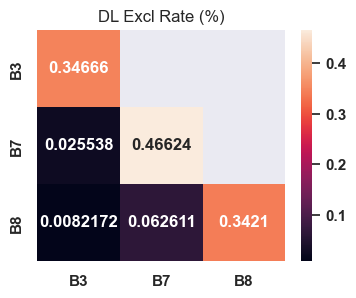

In [135]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Excl Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Average Latency

[[0.02313775, 0.0204345, 0.020368999999999998],
 [0, 0.02453025, 0.0211495],
 [0, 0, 0.0235555]]


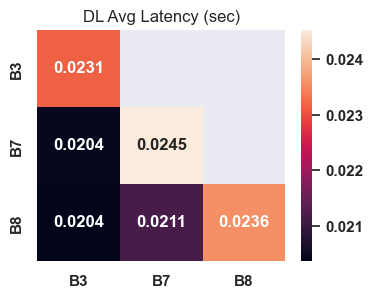

In [136]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Avg Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Max Latency

[[1.5383470000000001, 0.1631955, 0.12068625],
 [0, 0.6922385, 0.24792750000000002],
 [0, 0, 0.6070475]]


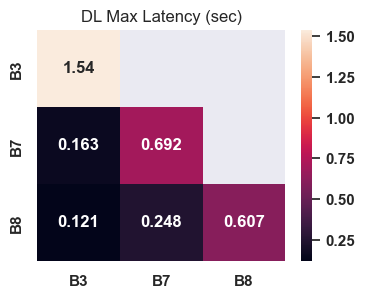

In [137]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Max Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})

# DL All

In [138]:
schemes = [
    # "B3",
    # "B7",
    # "B8",
    "All@qc01",
    "All@qc02",
    "All@qc03",
]
# xs = list(itertools.combinations(range(len(schemes)), 2))

df1 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#2/_Bandlock_Udp_all_RM500Q/combo/#01/udp_dnlk_combo_statistics.csv")
df2 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#2/_Bandlock_Udp_all_RM500Q/combo/#02/udp_dnlk_combo_statistics.csv")
# print(df1.at[0, 'lost.B3'])
# print(df2.at[0, 'lost.B3'])

df = pd.concat([df1, df2], axis=0)
df.reset_index(drop=True, inplace=True)
# print(df)
dfm = df.mean(axis=0)
# print(dfm)
# print(dfm['lost.B3'])

mat = []
for i in range(3):
    # mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            print(schemes[i], end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            print(f"{schemes[i]}.{schemes[j]}", end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            print(0, end=' ')
            # mat[i].append(0)
    print()

All@qc01 All@qc01.All@qc02 All@qc01.All@qc03 
0 All@qc02 All@qc02.All@qc03 
0 0 All@qc03 


### Loss Rate

[[0.6490929865455994, 0.26884467346928714, 0.0],
 [0, 1.0045317971397165, 0.0553095885658683],
 [0, 0, 0.49784355157663995]]


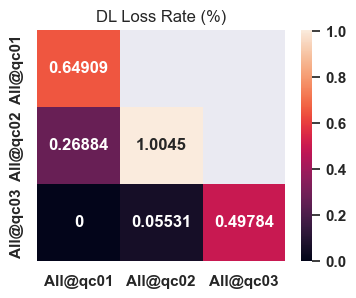

In [139]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Loss Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Excl Rate

[[0.5331640134225594, 0.0203535800036738, 0.00048659669406205],
 [0, 0.606067579357809, 0.0231527849481655],
 [0, 0, 0.3105827586781586]]


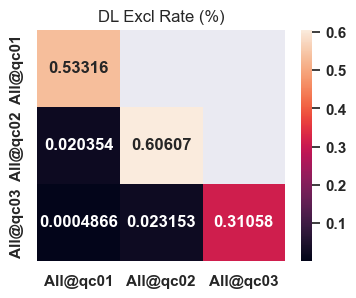

In [140]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Excl Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Average Latency

[[0.013253000000000001, 0.009811, 0.009236000000000001],
 [0, 0.0147365, 0.009125999999999999],
 [0, 0, 0.01094]]


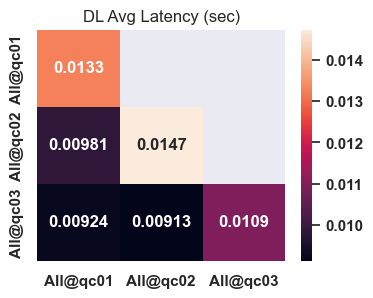

In [141]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Avg Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Max Latency

[[0.420586, 0.137215, 0.0895025], [0, 1.1922575, 0.134095], [0, 0, 0.30527]]


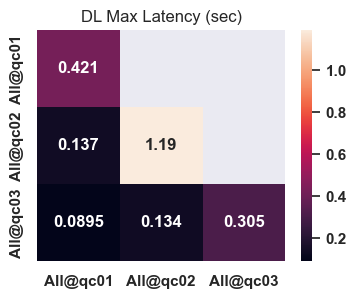

In [142]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("DL Max Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})

# UL B3.B7.B8

In [143]:
schemes = [
    "B3",
    "B7",
    "B8",
    # "All@qc01",
    # "All@qc02",
    # "All@qc03",
]
# xs = list(itertools.combinations(range(len(schemes)), 2))

df1 = pd.read_csv("/home/wmnlab/D/database/2023-02-04/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#01/udp_uplk_combo_statistics.csv")
df2 = pd.read_csv("/home/wmnlab/D/database/2023-02-04/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#02/udp_uplk_combo_statistics.csv")
df3 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#01/udp_uplk_combo_statistics.csv")
df4 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#02/udp_uplk_combo_statistics.csv")
# print(df1.at[0, 'lost.B3'])
# print(df2.at[0, 'lost.B3'])

# df = pd.concat([df1, df2], axis=0)
df = pd.concat([df1, df2, df3, df4], axis=0)
df.reset_index(drop=True, inplace=True)
# print(df)
dfm = df.mean(axis=0)
# print(dfm)
# print(dfm['lost.B3'])

mat = []
for i in range(3):
    # mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            print(schemes[i], end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            print(f"{schemes[i]}.{schemes[j]}", end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            print(0, end=' ')
            # mat[i].append(0)
    print()

B3 B3.B7 B3.B8 
0 B7 B7.B8 
0 0 B8 


### Loss Rate

[[0.03250181891693515, 0.00030159816976785, 0.000530134774631725],
 [0, 0.04324632043244194, 0.00019805449090235],
 [0, 0, 0.057276079657523425]]


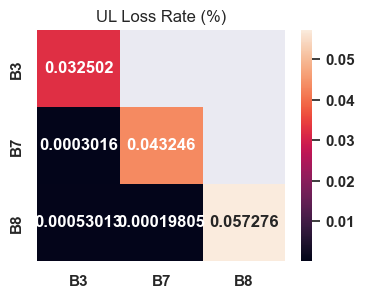

In [144]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Loss Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Excl Rate

[[0.288515990833207, 0.03175023135067615, 0.01162664383809675],
 [0, 0.5201051999706298, 0.04567132130427255],
 [0, 0, 0.6820130725569585]]


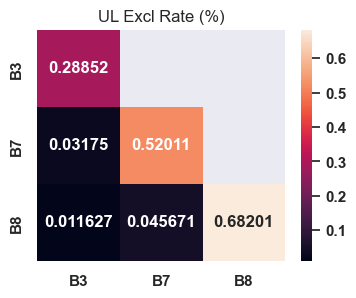

In [145]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Excl Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Average Latency

[[0.0224345, 0.02067, 0.0209065],
 [0, 0.0251015, 0.02168925],
 [0, 0, 0.02572525]]


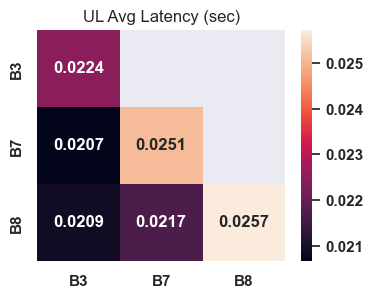

In [146]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Avg Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Max Latency

[[0.7489960000000001, 0.27316025, 0.21533325],
 [0, 1.21115675, 0.2388095],
 [0, 0, 0.70813025]]


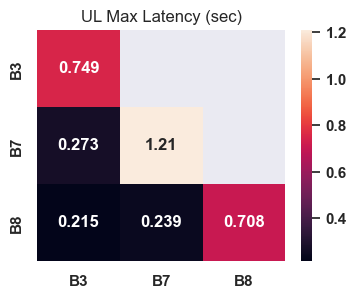

In [147]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Max Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})

# UL All

In [148]:
schemes = [
    # "B3",
    # "B7",
    # "B8",
    "All@qc01",
    "All@qc02",
    "All@qc03",
]
# xs = list(itertools.combinations(range(len(schemes)), 2))

df1 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#2/_Bandlock_Udp_all_RM500Q/combo/#01/udp_uplk_combo_statistics.csv")
df2 = pd.read_csv("/home/wmnlab/D/database/2023-02-04#2/_Bandlock_Udp_all_RM500Q/combo/#02/udp_uplk_combo_statistics.csv")
# print(df1.at[0, 'lost.B3'])
# print(df2.at[0, 'lost.B3'])

df = pd.concat([df1, df2], axis=0)
df.reset_index(drop=True, inplace=True)
# print(df)
dfm = df.mean(axis=0)
# print(dfm)
# print(dfm['lost.B3'])

mat = []
for i in range(3):
    # mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            print(schemes[i], end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            print(f"{schemes[i]}.{schemes[j]}", end=' ')
            # mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            print(0, end=' ')
            # mat[i].append(0)
    print()

All@qc01 All@qc01.All@qc02 All@qc01.All@qc03 
0 All@qc02 All@qc02.All@qc03 
0 0 All@qc03 


### Loss Rate

[[0.0951067513606889, 0.0, 0.0],
 [0, 0.2688202163251325, 0.0026762818173413],
 [0, 0, 0.05390917390017699]]


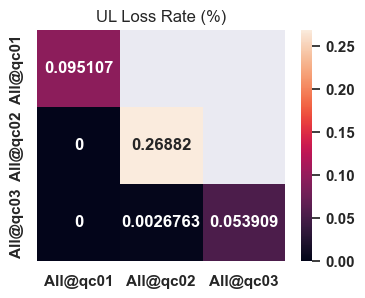

In [149]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'lost.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Loss Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Excl Rate

[[0.8378300073989244, 0.1485351252478556, 0.07896070430945554],
 [0, 0.9023118874880439, 0.14805936345576154],
 [0, 0, 0.5255125724193462]]


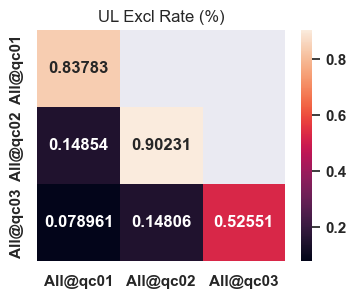

In [150]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'excl.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Excl Rate (%)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".5g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Average Latency

[[0.014517500000000001, 0.0106245, 0.008872],
 [0, 0.015256500000000001, 0.009621],
 [0, 0, 0.01251]]


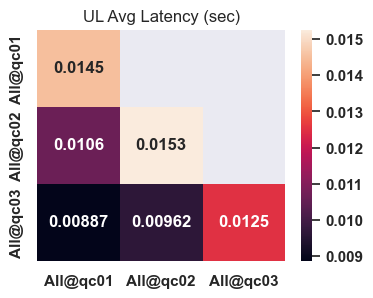

In [151]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'latency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Avg Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})

### Max Latency

[[0.9600385, 0.6585145, 0.2549895], [0, 1.0480295, 0.300089], [0, 0, 0.9977105]]


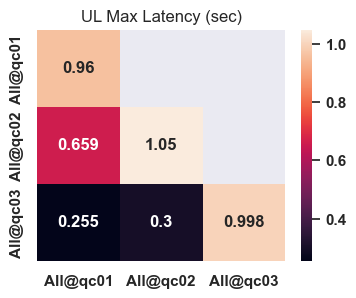

In [152]:
mat = []
for i in range(3):
    mat.append([])
    for j in range(3):
        if i == j:
            # print(i, end=' ')
            # print(schemes[i], end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}'])
        elif i < j:
            # print((i, j), end=' ')
            # print(f"{schemes[i]}.{schemes[j]}", end=' ')
            mat[i].append(dfm[f'mlatency.{schemes[i]}.{schemes[j]}'])
        else:
            # print(0, end=' ')
            mat[i].append(0)
    # print()
pprint(mat)

data = mat

import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(4, 3))
axis_labels = schemes
plt.title("UL Max Latency (sec)")
ax = sns.heatmap(np.array(data).T, xticklabels=axis_labels, yticklabels=axis_labels, mask=mask, annot=True, fmt=".3g")
# sns.set(rc = {'figure.figsize':(10,2)})